# 1. Import Necessary Libraries

In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [8]:
# For data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Split train and test data 
from sklearn.model_selection import train_test_split 

# Model 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

# Metrics 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

# 2. Load the Dataset

In [10]:
df = pd.read_csv("pregnancy_risk_prediction.csv", encoding='latin1')

# 3. Basic Data Exploration

In [12]:
# Check the first 5 dataset observations 
df.head()

,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
0,1994601,Moulya,20,97.5,91,161,100,24.9,41,5.8,high risk
1,2001562,Soni,45,97.7,99,99,94,22.1,36,5.7,high risk
2,2002530,Baishali,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,2002114,Abhilasha,26,99.5,135,161,101,23.7,46,4.5,high risk
4,2002058,Aanaya,38,102.5,51,106,91,18.8,38,4.3,high risk


In [13]:
# Check any 7 random observations
df.sample(7)


,Patient ID,Name,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl),Outcome
5301,2003596,Buddhana,22,98.6,89,135,86,22.2,39,4.6,low risk
341,2003766,Sharwani,35,96.3,114,122,86,21.2,47,5.9,high risk
102,2001991,Riparna,29,96.5,106,162,102,20.8,34,3.8,high risk
3235,2010581,Logita,32,101.1,103,125,91,19.7,37,6.5,mid risk
3918,1994040,Humsikha,35,98.3,134,108,87,23.2,40,6.8,mid risk
2786,2001699,Chandaghanta,33,95.8,119,130,98,21.3,33,4.9,mid risk
4401,1993638,Litsa,33,95.1,102,121,83,20.0,38,4.7,mid risk


In [14]:
# Check the no of rows and columns 
df.shape

(6103, 11)

. The dataset has 6013 observations/features and 11 columns.
. Note The target variable is 'Outcome' column
.We don't need the patient ID and Name columns because they have no contribution/impact to our model prediction.
. So, we will remove them from the dataset under data preprocessing step.

In [16]:
# Check dataset info and datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6103 entries, 0 to 6102
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Patient ID                         6103 non-null   int64  
 1   Name                               6103 non-null   object 
 2   Age                                6103 non-null   int64  
 3   Body Temperature(F)                6103 non-null   float64
 4   Heart rate(bpm)                    6103 non-null   int64  
 5   Systolic Blood Pressure(mm Hg)     6103 non-null   int64  
 6   Diastolic Blood Pressure(mm Hg)    6103 non-null   int64  
 7   BMI(kg/m 2)                        6103 non-null   float64
 8   Blood Glucose(HbA1c)               6103 non-null   int64  
 9   Blood Glucose(Fasting hour-mg/dl)  6103 non-null   float64
 10  Outcome                            6103 non-null   object 
dtypes: float64(3), int64(6), object(2)
memory usage: 524.6+ 

In [17]:
# Check missing values 
df.isnull().sum()

Patient ID                           0
Name                                 0
Age                                  0
Body Temperature(F)                  0
Heart rate(bpm)                      0
Systolic Blood Pressure(mm Hg)       0
Diastolic Blood Pressure(mm Hg)      0
BMI(kg/m 2)                          0
Blood Glucose(HbA1c)                 0
Blood Glucose(Fasting hour-mg/dl)    0
Outcome                              0
dtype: int64

In [18]:
#check the duplicated values
df.duplicated().sum()

0

In [19]:
# Summary statistics of the data 
df.describe()

,Patient ID,Age,Body Temperature(F),Heart rate(bpm),Systolic Blood Pressure(mm Hg),Diastolic Blood Pressure(mm Hg),BMI(kg/m 2),Blood Glucose(HbA1c),Blood Glucose(Fasting hour-mg/dl)
count,6.103000e+03,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000,6103.000000
mean,2.003343e+06,26.425037,98.665574,86.100770,129.218253,87.257578,21.435581,37.904473,5.504752
std,6.604395e+03,6.390205,1.590983,22.627587,17.234217,7.793099,2.157060,4.400272,0.905327
min,1.993365e+06,15.000000,39.600000,45.000000,90.000000,9.000000,14.900000,30.000000,3.500000
25%,1.994890e+06,22.000000,98.600000,72.000000,120.000000,82.000000,19.600000,34.000000,4.800000
50%,2.003000e+06,25.000000,98.600000,80.000000,128.000000,87.000000,21.300000,38.000000,5.700000
75%,2.010128e+06,30.000000,98.800000,91.000000,141.000000,92.000000,23.100000,41.000000,6.000000
max,2.013179e+06,250.000000,104.000000,150.000000,169.000000,142.000000,27.900000,50.000000,8.900000


* The average age of the reported pregnant patient in the dataset is about **26 years**
* The youngest reported patient in the dataset is **15 years**
* The average blood sugar level(HbA1c) in the dataset is **37mm0l/L**
* The lowest reported heart rate in the dataset is **45 beats/min**
* The average systolic blood pressure in the dataset is about **129mmHg**
* The average diastolic blood pressure in the dataset is about **87mmHgmmHg**

#  4. Data Preprocessing

In [23]:
#Drop irrelevant columns from data
df.drop(columns = ['Patient ID','Name'],inplace = True)

* We dropped **patient ID** and **Name** columns since as stated above, they don't have any impact in helping us predict the model outcome.

* In the code below, we rename the dataset features to reduce the likelihood of errors when referencing columns in our analysis and model building

In [25]:
#Rename the column names 
df.rename(columns={'Body Temperature(F) ':'Body Temperature', 
                   'Heart rate(bpm)': 'Heart Rate', 
                   'Systolic Blood Pressure(mm Hg)':'Systolic Blood Pressure', 
                   'Diastolic Blood Pressure(mm Hg)':'Diastolic Blood Pressure',
                   'BMI(kg/m 2)':'BMI',
                   'Blood Glucose(HbA1c)':'Blood Glucose HbA1c',
                   'Blood Glucose(Fasting hour-mg/dl)':'Blood Glucose Fasting'
                
                  }, inplace=True)

In [26]:
df.head()

,Age,Body Temperature,Heart Rate,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Blood Glucose HbA1c,Blood Glucose Fasting,Outcome
0,20,97.5,91,161,100,24.9,41,5.8,high risk
1,45,97.7,99,99,94,22.1,36,5.7,high risk
2,29,98.6,84,129,87,19.0,42,6.4,mid risk
3,26,99.5,135,161,101,23.7,46,4.5,high risk
4,38,102.5,51,106,91,18.8,38,4.3,high risk


*  **Encoding** 

In [28]:
#Encode the target column from categorical to numerical
encoder = LabelEncoder()

encoded_target = encoder.fit_transform(df['Outcome'])
encoded_target

array([0, 0, 2, ..., 0, 0, 1])

In [29]:
df['Outcome'] = encoded_target

In [31]:
df.sample(5)

,Age,Body Temperature,Heart Rate,Systolic Blood Pressure,Diastolic Blood Pressure,BMI,Blood Glucose HbA1c,Blood Glucose Fasting,Outcome
3955,27,97.4,47,102,97,24.8,34,5.1,0
5258,20,100.0,68,99,91,18.8,36,5.7,0
3262,27,98.6,82,112,96,23.8,34,6.2,2
1102,21,98.6,111,141,98,23.6,36,6.6,2
1589,25,98.6,75,130,86,21.2,34,4.9,1


In [32]:
# Retrieve the encoding class mapping
class_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
class_mapping


{'high risk': 0, 'low risk': 1, 'mid risk': 2}

#  5. Data Visualization

* To help understand dataset distributions

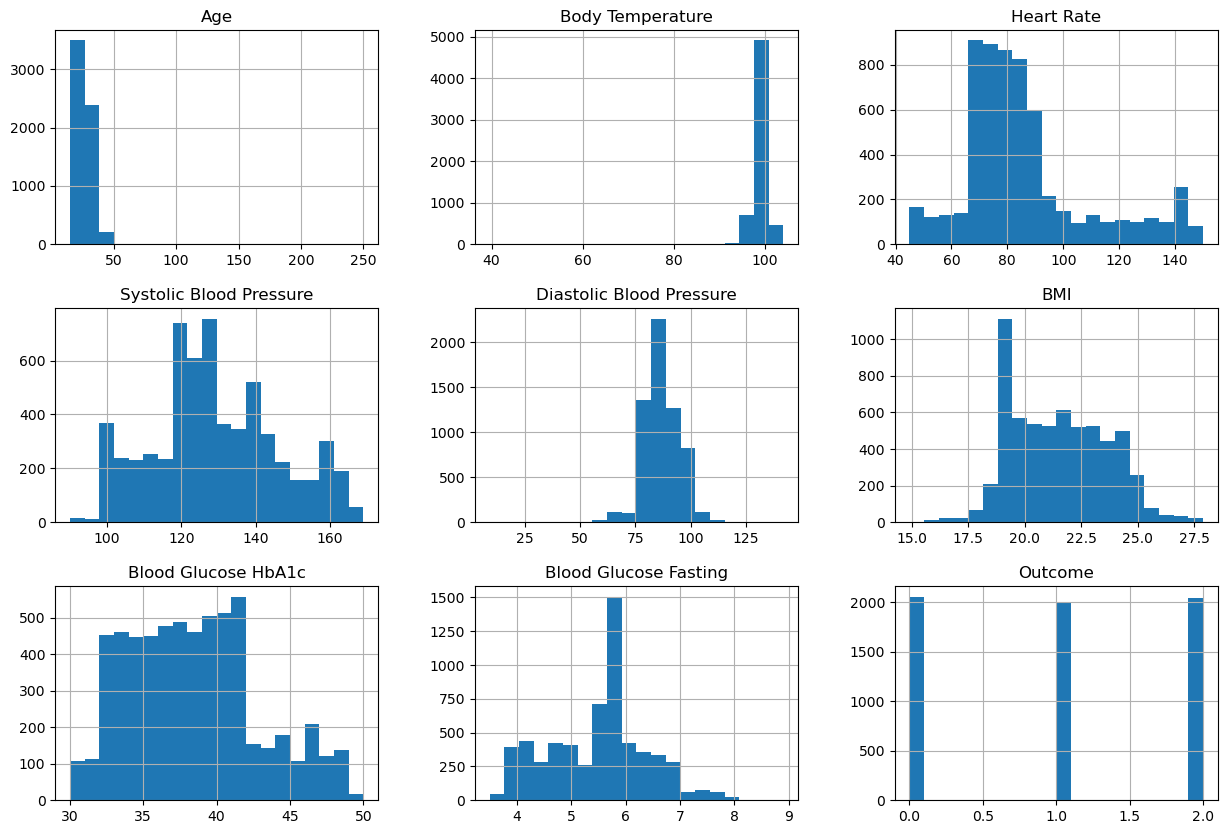

In [35]:
#plot histograms

df.hist(bins =20 , figsize=(15,10))
plt.show()

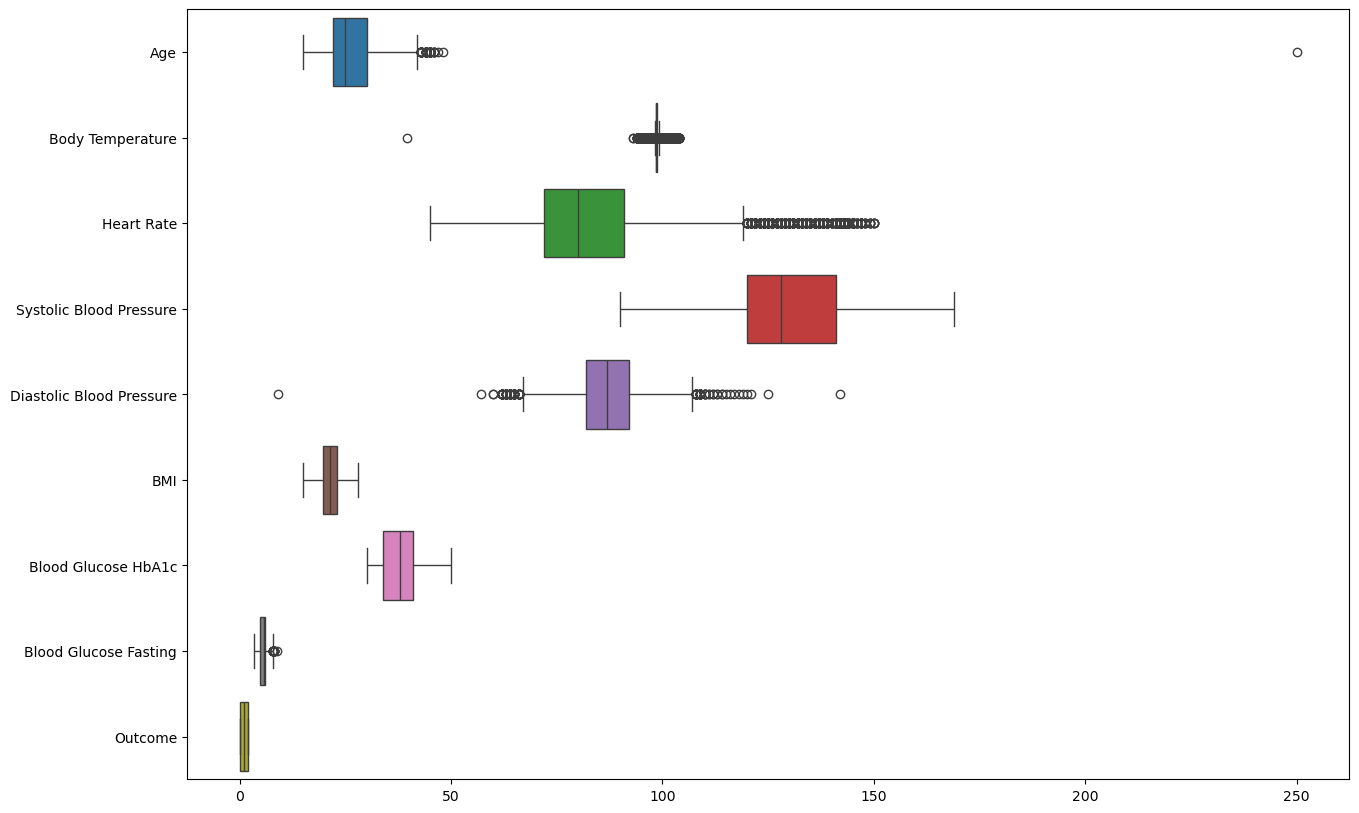

In [36]:
#Box plot ~ Create a fig with multiple box plots

plt.figure(figsize=(15,10))
sns.boxplot(data= df, orient = 'h')
plt.show()

#  6. Check Class Imbalance
Class imbalance refers to a situation where the number of instances in each class is not evenly distributed. By being aware of<br> class imbalance and addressing it appropriately, we aim to build a robust model that performs well leading to reliable model performance results.

**Class target mapping of pregnancy risk levels**

* Low risk: 1
* Medium risk: 2
* High risk: 0

In [38]:
df['Outcome'].value_counts()

Outcome
0    2059
2    2043
1    2001
Name: count, dtype: int64

In [39]:
imbalance_ratio = df['Outcome'].value_counts(normalize =True) * 100
imbalance_ratio

Outcome
0    33.737506
2    33.475340
1    32.787154
Name: proportion, dtype: float64

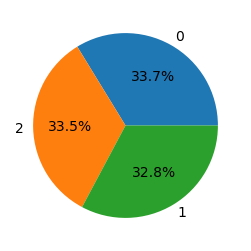

In [41]:
#Plot class distirubution using pie

plt.figure(figsize = (5,3))
plt.pie(imbalance_ratio, labels = imbalance_ratio.index , autopct = '%1.1f%%')
plt.title = 'Target Class Distribution'
plt.show()

## Analysis of Class Imbalance

* High risk: Approximately 33.7% of the observations are labeled as "high risk"
* Medium risk: Approximately 32.8% of the observations are labeled as "mid risk"
* Low risk: Approximately 33.5% of the observations are labeled as "low risk"

From the percentages, the dataset is fairly balanced across the three target classes.
 So, there is no class imbalance in the <br>dataset, which means that each class or
 category within our target variable (or outcome variable) is represented in roughly equal proportions

# 7. Feature Extraction

In [49]:
#Extract train and test data 
target = 'Outcome'

y = df['Outcome']

#X features
X = df.drop(columns = target)

# 8. Train-Test Split
 It involves dividing the available dataset into two separate sets:

* **Train set :** to train the model
* **Test set :** to evaluate the model's performance.

By training the model on one subset (the training set) and testing
on another (the testing set), we can get a more accurate measure of the model performance.

In [55]:
 # Dividing data on 70/30 % proportion  
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,shuffle = True , random_state = 42)

In [58]:
# Dipslay train and test proportions
print(X.shape, X_train.shape, X_test.shape)

(6103, 8) (4882, 8) (1221, 8)


# 9. Model Training ¶
##  a) Logistic Regression

*  Logistic regression is a popular machine learning algorithm used for binary classification. However, it can be <br>extended to handle multi-class classification problems through techniques such as One-vs-Rest (OvR) and Softmax (Multinomial) regression.

In [83]:
# Create an instance of logistic model 
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)


#Train model 
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, multi_class='multinomial')

In [84]:
log_model.predict(X_test)

array([1, 1, 0, ..., 1, 0, 2])

In [93]:
# Model elevation
X_train_pred = log_model.predict(X_train)
Train_acc = accuracy_score(X_train_pred, y_train)
print('Train accuracy score:', Train_acc)

# Test data prediction 
X_test_pred = log_model.predict(X_test)
Test_acc = accuracy_score(X_test_pred, y_test)

print("Test accuracy score :", Test_acc)

Train accuracy score: 0.5528471937730438
Test accuracy score : 0.5372645372645373


## b) Decision Tree Model

A decision tree is a supervised learning model used for both classification and regression tasks. 
It splits the data into subsets based on the value of input features,  <br>
creating a tree-like model of decisions. 
The goal is to create a model that predicts the value of a target 
variable by learning simple decision <br> rules inferred from the data features.

In [108]:
#create an instance of logistic model
dt_model = DecisionTreeClassifier(random_state=32)

# Train model
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=32)

In [110]:
dt_model.predict(X_test)

array([1, 0, 0, ..., 1, 2, 1])

In [114]:
# Model evaluation 
X_train_pred = dt_model.predict(X_train)
Train_acc = accuracy_score(X_train_pred, y_train)

print('Train accuracy score:', Train_acc)

#Test Data prediction
X_test_pred = dt_model.predict(X_test) 
Test_acc = accuracy_score(X_test_pred, y_test)

print('Test accuracy score:', Test_acc)

Train accuracy score: 1.0
Test accuracy score: 0.9828009828009828


## c) Random Forest Model
Random Forest model is an ensemble learning method primarily used for classification and regression tasks. It builds multiple <br>decision trees and merges them together to get a more accurate and stable prediction.

In [120]:
rf_model = RandomForestClassifier(n_estimators = 100 , random_state=32)
#Train model 
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=32)

In [122]:
rf_model.predict(X_test)

array([1, 0, 0, ..., 1, 2, 1])

In [202]:
#model evalution 
X_train_pred = rf_model.predict(X_train)
Train_acc = accuracy_score(X_train_pred , y_train)

print("Train Accuracy scorer: ", Train_acc)

#test data predictions
X_test_Pred = rf_model.predict(X_test)
Test_acc =accuracy_score(X_test_pred, y_test)

print("Test Accuracy score :", Test_acc)

Train Accuracy scorer:  1.0
Test Accuracy score : 0.9828009828009828


## d) AdaBoost Model
Adaboost, short for Adaptive Boosting, is a powerful ensemble machine learning technique, particularly effective for classification <br>problems and less prone to overfitting.

In [209]:
ad_model = AdaBoostClassifier(n_estimators=50,random_state = 32)
#train model 
ad_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=32)

In [211]:
ad_model.predict(X_test)

array([1, 0, 0, ..., 1, 2, 1])

In [213]:
#model Evalution
X_train_pred= ad_model.predict(X_train)
Train_acc = accuracy_score(X_train_pred, y_train)

print("Train Accuracy score :", Train_acc)

#Test data predictions
X_test_pred = ad_model.predict(X_test)
Test_acc = accuracy_score(X_test_pred , y_test)

print("Test Accuracy score :", Test_acc)

Train Accuracy score : 0.9352724293322409
Test Accuracy score : 0.9484029484029484


## e) Support Vector Machine
Support Vector Machine (SVM) is a powerful and versatile supervised machine learning algorithm used for both classification and regression tasks. It's <br>particularly popular in classification problems. SVM is sensitive to the scale of the data, so it's important to

In [216]:
# Intialize the SVM object
svm_model= SVC(kernel= 'linear' , random_state=32)


In [218]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [220]:
#Train the model 
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=32)

In [222]:
# make predictions 
svm_model.predict(X_test_scaled)

array([1, 1, 0, ..., 1, 2, 2])

In [226]:
# Model evaluation 
X_train_pred = svm_model.predict(X_train_scaled)
Train_acc = accuracy_score(X_train_pred, y_train)

print('Train accuracy score:', Train_acc)

#Test Data prediction
X_test_pred = svm_model.predict(X_test_scaled) 
Test_acc = accuracy_score(X_test_pred, y_test)

print('Test accuracy score:', Test_acc)

Train accuracy score: 0.6040557148709546
Test accuracy score: 0.5904995904995906


In [228]:
# Create Accuracy Scores Model Table 
models = ['Logistic Regression','Decision Tree Model', 'Random Forest', 'Ada Boost Model','Support Vector Machine']
train_accuracies = [0.55, 0.1, 0.1, 0.94, 0.60]
test_accuracies = [0.54, 0.98, 0.99, 0.95, 0.59]


# Create a dictionary with the data
data = {
    'Model': models,
    'Train Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies
}
# Create a DataFrame
df_accuracy = pd.DataFrame(data)

# Set 'Model' as the index for better display
df_accuracy.set_index('Model', inplace=True)

# Display the table
print(df_accuracy)

                        Train Accuracy  Test Accuracy
Model                                                
Logistic Regression               0.55           0.54
Decision Tree Model               0.10           0.98
Random Forest                     0.10           0.99
Ada Boost Model                   0.94           0.95
Support Vector Machine            0.60           0.59


## Best Model
We picked Ada Boost model~ for prediction because it has a score of 95% and is less prone to overfitting.

# Create a Prediction System

In [238]:
input_data = (23,98.6,76,129,83,18.5,40,6) 

# Convert the input data into a numpy array
input_data_as_numpy = np.asarray(input_data)

# Reshape the array since we are predicting for one instance
input_data_reshape = input_data_as_numpy.reshape(1,-1)

# Making prediction and printing the appropriate message
prediction = ad_model.predict(input_data_reshape)
print(prediction)
             
if prediction[0] == 0:
    print('High Risk Pregnancy: It is crucial to seek urgent medical attention to ensure the health and safety of both you and your baby. Please consult your healthcare provider immediately.')
elif prediction[0] == 2:
    print('Medium Risk Pregnancy: It is important to seek medical attention to monitor and manage any potential complications. Please schedule an appointment with your healthcare provider soon.') 
elif prediction[0] == 1:
    print('Low Risk: Your pregnancy is currently considered low risk. Continue with your regular prenatal check-ups and maintain a healthy lifestyle.')
else:
    print('Error: Please enter valid numerical values')
    

[1]
Low Risk: Your pregnancy is currently considered low risk. Continue with your regular prenatal check-ups and maintain a healthy lifestyle.


# Save Trained Model for Deployment

In [245]:
filename = 'trained_model.sav'
pickle.dump(ad_model, open(filename, 'wb'))

In [247]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [249]:
input_data = (23,98.6,76,129,83,18.5,40,6)

# Convert the input data into a numpy array
input_data_as_numpy = np.asarray(input_data)

# Reshape the array since we are predicting for one instance
input_data_reshape = input_data_as_numpy.reshape(1,-1)

# Making prediction
prediction = loaded_model.predict(input_data_reshape)
print (prediction)

if prediction[0] == 0:
    print('High Risk Pregnancy: It is crucial to seek urgent medical attention to ensure the health and safety of both you and your baby. Please consult your healthcare provider immediately.')
elif prediction[0] == 2:
    print('Medium Risk Pregnancy: It is important to seek medical attention to monitor and manage any potential complications. Please schedule an appointment with your healthcare provider soon.') 
elif prediction[0] == 1:
    print('Low Risk: Your pregnancy is currently considered low risk. Continue with your regular prenatal check-ups and maintain a healthy lifestyle.')
else:
    print('Error: Please enter valid numerical values')

[1]
Low Risk: Your pregnancy is currently considered low risk. Continue with your regular prenatal check-ups and maintain a healthy lifestyle.


In [251]:
for column in X.columns:
    print(column)

Age
Body Temperature
Heart Rate
Systolic Blood Pressure
Diastolic Blood Pressure
BMI
Blood Glucose HbA1c
Blood Glucose Fasting
